In [102]:
SEED = 11

In [103]:
import torch
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [104]:
torch.manual_seed(SEED)

In [105]:
cpu_tensor = torch.zeros(2,3)
device = torch.device("cuda:0")
gpu_tensor = cpu_tensor.to(device)
print(gpu_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [106]:
mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 3)
torch.mm(mat1, mat2)

tensor([[-1.5164,  4.0276, -0.3932],
        [ 0.2337, -1.1119, -0.4701]])

In [107]:
mat1.mm(mat2)

tensor([[-1.5164,  4.0276, -0.3932],
        [ 0.2337, -1.1119, -0.4701]])

In [108]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [109]:
num_data = 1000
num_epoch = 10000

In [110]:
noise = init.normal_(torch.FloatTensor(num_data, 1), mean=0., std=1.)
x = init.uniform_(torch.Tensor(num_data, 1), -15, 15)
y = (x**2) + 3
y_noise = y+noise

In [111]:
model = nn.Sequential(nn.Linear(1,6),
                      nn.ReLU(),
                      nn.Linear(6,10),
                      nn.Sigmoid(),
                      nn.Linear(10,6),
                      nn.Sigmoid(),
                      nn.Linear(6, 1),
        )
# 마지막에 linear가 꼭 필요한 것은 아니다 ..!!!!!!!
# 해당 예제에서는 y값이 0~1 사이가 아니고,
# 마지막 activation인 6개 sigmoid를 합치기 위해 linear 함수를 사용한 것
# 아래처럼 ReLU를 last 에 두면 loss가 감소되는 것을 볼 수 있음

In [112]:
loss_func = nn.MSELoss()

In [113]:
optimizer = optim.SGD(model.parameters(), lr = 0.0003)

In [114]:
arr_loss = []

In [115]:
torch.manual_seed(SEED)

In [116]:
for ii in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer.step()
    arr_loss.append(loss)

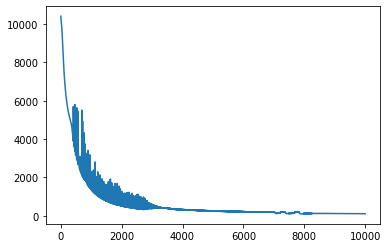

In [117]:
plt.plot(arr_loss)

In [118]:
arr_loss[-1]

tensor(112.0068, grad_fn=<MseLossBackward>)

In [119]:
model = nn.Sequential(nn.Linear(1,6),
                      nn.ReLU(),
                      nn.Linear(6,10),
                      nn.Sigmoid(),
                      nn.Linear(10,6),
                      nn.ReLU(),
        )
# 마지막에 linear가 꼭 필요한 것은 아니다 ..!!!!!!!
#  ReLU를 last 에 두면 loss가 감소되는 것을 볼 수 있음

In [120]:
loss_func = nn.MSELoss()

In [121]:
optimizer = optim.SGD(model.parameters(), lr = 0.0003)

In [122]:
arr_loss = []

In [123]:
torch.manual_seed(SEED)

In [124]:
for ii in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer.step()
    arr_loss.append(loss)

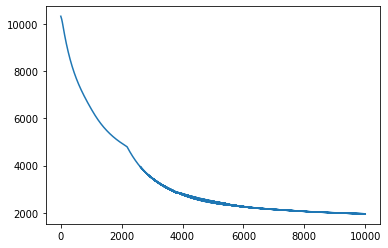

In [125]:
plt.plot(arr_loss)

In [126]:
arr_loss[-1]

tensor(1954.0156, grad_fn=<MseLossBackward>)